# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

El primer paso será abrir los archivos csv en un editor de texto para poder observar el tipo de separador del archivo así como otras carácteristicas, posteriormente solo deberemos abrir los archivos con `.read_csv()` introduciendo los parámetros necesarios. Comprobaremos los datos con una muestra aleatoria usando el metodo `.sample()` y visualizaremos información general con `.info()`

In [10]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
# para facilitar el código nombraré los df con el mismo nombre del archivo
df_instacart_orders = pd.read_csv( '/datasets/instacart_orders.csv', sep = ';' )

df_products = pd.read_csv( '/datasets/products.csv', sep = ';' )

df_aisles = pd.read_csv( '/datasets/aisles.csv', sep = ';' )

df_departments = pd.read_csv( '/datasets/departments.csv', sep = ';' )

df_order_products = pd.read_csv( '/datasets/order_products.csv', sep = ';' )

In [3]:
# mostrar información del DataFrame
df_instacart_orders.info()
print()
df_instacart_orders.sample( 5 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
343253,1129016,95882,19,1,17,2.0
85111,2102207,133384,3,5,7,4.0
244993,1336224,83230,4,1,8,14.0
246678,31631,59278,2,0,9,8.0
284188,589640,38635,6,6,22,6.0


In [4]:
# mostrar información del DataFrame
df_products.info()
print()
df_products.sample( 5 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
1136,1137,Cerveza Especial Imported Beer From Mexico,27,5
13038,13039,Creme Fraiche- Organic,108,16
16122,16123,Lemon Lime Mexican Soda,77,7
22279,22280,Gluten Free Three Cheese Pizza,79,1
14881,14882,2% Milkfat Reduced Fat Milk,84,16


In [5]:
# mostrar información del DataFrame
df_aisles.info()
print()
df_aisles.sample( 5 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
78,79,frozen pizza
45,46,mint gum
86,87,more household
53,54,paper goods
46,47,vitamins supplements


In [6]:
# mostrar información del DataFrame
df_departments.info()
print()
df_departments.sample( 5 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
6,7,beverages
12,13,pantry
18,19,snacks
17,18,babies
0,1,frozen


In [7]:
# mostrar información del DataFrame
df_order_products.info( show_counts = True )
print()
df_order_products.sample( 5 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
4223188,260031,16797,18.0,0
1337012,145741,1909,2.0,1
3670905,2695466,47977,5.0,1
158481,881460,7562,22.0,0
4169157,3345885,19477,18.0,1


## Conclusiones

Es importante la descripción de los datos para saber con que vamos a estar trabajando.
Me doy cuenta que habrá que tratar con algunos datos nulos y habrá que buscar duplicados pero eso se hará en los próximos pasos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Para solucionar el paso 2 se trabajará un DataFrame a la vez Y se aplicarán diferentes técnicas para poder limpiar los datos,
Lo primero será tratar con los valores duplicados más obvios y depués buscando algunos que se encuentren más escondidos
y después se localizarán los valores ausentes para determinar si es viable eliminarlos o quizá introducir algún valor en función de los valores promedio del conjunto de datos, esto se determinará sobre la marcha y conforme se exploren los datos faltantes y se descubra por qué es que faltan.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
#Se llama a duplicated para encontrar todos los registros duplicados.
#Se aplica '.duplicated()' en la columna 'order_id' porque según la descripción de la propia columna el ID de una orden no se puede repetir, así que si hay más de un ID significa que estamos tratando con un duplicado
duplicados = df_instacart_orders[ 'order_id' ].duplicated().sum()

print( f'El número de lineas duplicadas es: { duplicados }' )

#La siguiente linea de código nos muestra una tabla con los registros duplicados que se encontraron.
df_instacart_orders[ df_instacart_orders[ 'order_id' ].duplicated() ]


El número de lineas duplicadas es: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Se encontraron 15 lineas duplicadas, todos los duplicados son del miércoles a las 2 de la mañana

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

#se aplica el filtro y el DataFrame resultante se ordena por 'order_id' para poder visualizar los duplicados más fácilmente.
df_instacart_orders.query('order_dow ==  3 and order_hour_of_day == 2').sort_values( 'order_id' )


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


¿Qué sugiere este resultado?
Tomando en cuenta que hay casi 500000 lineas, nos podemos dar cuenta que los pedidos hechos los miercoles a las 2 de la mañana son realmente muy pocos( solo se encontrarón 121 pedidos ), quizá algún error en el sistema está generando los registros duplicados, pero afortunadamente han sido muy pocos

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders.drop_duplicates( inplace = True )
# Restablecemos los indices del DataFrame
df_instacart_orders.reset_index( drop = True, inplace = True )


In [11]:
# Vuelve a verificar si hay filas duplicadas

#Se llama a duplicated para encontrar todos los registros duplicados.
duplicados = df_instacart_orders.duplicated().sum()

print( f'El número de lineas duplicadas es: { duplicados }' )


El número de lineas duplicadas es: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_instacart_orders[ 'order_id' ].duplicated().sum()

print( f'El número de IDs duplicados es: { duplicados }' )

El número de IDs duplicados es: 0


Aplicando algunos metodos propios de Pandas me pude percatar de la presencia de lineas duplicadas, aunque haciendo un analisis más detallado encontré que todos los duplicados erán de días míercoles a las 2 am (quizá sea algún problema del sistema), de cualquier forma eran muy pocas lineas duplicadas y no fue un gran problema lidiar co ellas.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
duplicates = df_products.duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )

Duplicados encontrados: 0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
duplicates = df_products['product_id'].duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )

Duplicados encontrados: 0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
# Creamos el filtro para mostrar solo los nombres duplicados ignorando los valores NaN
mask = ( df_products[ 'product_name' ].str.upper().duplicated() ) & ( ~df_products[ 'product_name' ].isna() )
# Ahora aplicamos el filtro y contamos el total de duplicados
duplicates = df_products[ mask ][ 'product_id' ].count()

print( f'Duplicados encontrados: {duplicates}' )

#Mostramos algunos de los duplicados en pantalla
df_products[ mask ].sample( 10 )

Duplicados encontrados: 104


,product_id,product_name,aisle_id,department_id
24293,24294,Solid White Albacore Tuna in Water,95,15
14961,14962,Hearts of Palm,81,15
43775,43776,Protein Plus Vanilla Bean Protein Shake,31,7
45230,45231,Bag Of Oranges,24,4
19042,19043,Fresh Scent Dishwasher Detergent With Dawn,74,17
26166,26167,UltraGel Personal Lubricant,6,2
40093,40094,Wild Sardines In Spring Water,95,15
37634,37635,Chili with Beans,59,15
35977,35978,Mozzarella Sticks with Marinara Sauce,129,1
49688,49689,FLUFFLY VANILLA MARSHMALLOW FROSTING,97,13


Una ves que encontramos todos los nombres duplicados podriamos simplemente borrarlos y continuar, pero debido a que la columna `product_id` es referenciada en el DataFrame `df_order_products` primero deberiamos asegurarnos de que los IDs de los duplicados que vamos a borrar no estén asociados a ninguna linea en dicho DataFrame, de ser así deben corregirse.

In [16]:
#Comprobar si los IDs de los productos que serán eliminados están asociados a alguna linea en 'df_order_products'
#Comprobaremos esto con la ayuda de .isin()
#La variable 'mask' contiene el filtro que se declaró en la celda anterior
df_products[ mask ]['product_id'].isin( df_order_products ).sum()


0

In [17]:
# Eliminar lineas duplicadas.
#Ahora que estamos seguros que eliminar las lineas duplicadas no afectará a otros DataFrames podemos proceder.
#Esta vez no usaremos ningún método, ya que anteriormente habíamos creado un filtro para mostrar todas las lineas que queriamos eliminar
#Solo hace falta negar el resultado de ese mismo filtro para traer solo las lineas que nos interesa conservar
df_products = df_products[ ~mask ]
# Ahora solo aplicamos reset a los indices y listo
df_products.reset_index( drop = True, inplace = True )


In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
# Para comprobar si los duplicados fueron eliminados repetiremos el mismo proceso de antes

# Creamos el filtro para mostrar solo los nombres duplicados ignorando los valores NaN
mask = ( df_products[ 'product_name' ].str.upper().duplicated() ) & ( ~df_products[ 'product_name' ].isna() )
# Ahora aplicamos el filtro y contamos el total de duplicados
duplicates = df_products[ mask ][ 'product_id' ].count()

print( f'Duplicados encontrados: {duplicates}' )


Duplicados encontrados: 0


Encontrar duplicados fue un poco más complejo para este data frame pero aplicando tecnicas básicas pude darme cuenta que algunos nombres estaban repetidos solo que se encontraban escritos en mayusculas, una vez encontrados solo tuve que verificar que eliminar estos duplicados no fuera a afectar a otros data frames y los eliminé

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

duplicates = df_departments.duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )

Duplicados encontrados: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de departamentos
duplicates = df_departments['department_id'].duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )

Duplicados encontrados: 0


Para este DataFrame no se encontraron duplicados en ninguna columna

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicates = df_aisles.duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )

Duplicados encontrados: 0


In [22]:
# Revisa únicamente si hay IDs duplicadas de aisles
duplicates = df_aisles['aisle_id'].duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )

Duplicados encontrados: 0


Para este DataFrame no se encontraron duplicados en ninguna columna 

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
duplicates = df_order_products.duplicated().sum()

print( f'Duplicados encontrados: {duplicates}' )


Duplicados encontrados: 0


In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicates = df_order_products[ 'order_id' ].duplicated().sum()
print( f'Duplicados en order_id: {duplicates}' )

duplicates = df_order_products[ 'product_id' ].duplicated().sum()
print( f'Duplicados en product_id: {duplicates}' )


Duplicados en order_id: 4094961
Duplicados en product_id: 4499434


En este DataFrame se encontraron una gran cantidad de datos duplicados, pero esto se debe a que varias de sus columnas almacenan datos categoricos, es la razón por la que se repiten tanto

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products[ df_products[ 'product_name' ].isna() ]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49454,49553,NaN,100,21
49476,49575,NaN,100,21
49542,49641,NaN,100,21
49565,49664,NaN,100,21


Logré encontrar una gran cantidad de datos ausentes y al parecer una gran cantidad de ellos tienen un `aisle_id = 100`  y
`department_id = 21`, habrá que explorar un poco más a fondo para comprobar si los 1258 registros ausentes tienen este rasgo en común o son solo una gran catidad de ellos

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
total = df_products[ ( df_products[ 'product_name' ].isna() ) & ( df_products[ 'aisle_id' ] == 100 ) ][ 'product_id' ].count()

print( f'El total de los registros ausentes que pertenecen al "isle_id = 100" son: {total}' )

El total de los registros ausentes que pertenecen al "isle_id = 100" son: 1258


Después de aplicar un filtro más elaborado puedo confirmar que todos los datos ausentes tienen en común la pertenencia a  `aisle_id = 100`

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
total = df_products[ ( df_products[ 'product_name' ].isna() ) & ( df_products[ 'department_id' ] == 21 ) ][ 'product_id' ].count()

print( f'El total de los registros ausentes que pertenecen al "department_id = 21" son: {total}' )

El total de los registros ausentes que pertenecen al "department_id = 21" son: 1258


Confirmo que efectivamente todos los datos ausentes también pertenencen al `department_id = 21`

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[ df_aisles[ 'aisle_id' ] == 100 ])
print()
print(df_departments[ df_departments[ 'department_id' ] == 21 ])


    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Tras investigar un poco me percaté de que tanto `department_id = 21` y `aisle_id = 100` tienen el nombre `missing`

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products = df_products.fillna( 'Unknown' )

#comprobamos que ya no hay valores ausentes
df_products[ df_products[ 'product_name' ].isna() ]

,product_id,product_name,aisle_id,department_id


Los datos ausentes han sido reemplazados por 'Unknown'

### `orders` data frame

In [30]:
# Encuentra los valores ausentes
total = df_instacart_orders[ 'days_since_prior_order' ].isna().sum()
print( f'El total de valores ausentes es de: { total }' )
# Mostraremos algunas lineas con valores ausentes
df_instacart_orders[ df_instacart_orders[ 'days_since_prior_order' ].isna() ].sample( 5 )

El total de valores ausentes es de: 28817


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
205553,1313328,189005,1,6,14,NaN
448682,860106,62974,1,1,10,NaN
440725,3338486,158442,1,0,10,NaN
331458,89469,93540,1,2,14,NaN
99078,2862977,146306,1,2,7,NaN


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

mask = df_instacart_orders[ 'days_since_prior_order' ].isna() & ( df_instacart_orders[ 'order_number' ] != 1 )

total = df_instacart_orders[ mask ][ 'user_id' ].count()

print( f'El total de valores ausentes que no corresponden a una celda con "order_number = 0 es de": { total }' )

# Imprimimos el DataFrame para poder observar que está vacío.
df_instacart_orders[ mask ]


El total de valores ausentes que no corresponden a una celda con "order_number = 0 es de": 0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [32]:
# Solución a los valores ausentes
# Calcular la mediana de los datos
median = df_instacart_orders[ 'days_since_prior_order' ].median()

# Completa los nombres de productos ausentes con la mediana de los datos
df_instacart_orders = df_instacart_orders.fillna( median )

#comprobamos que ya no hay valores ausentes
df_instacart_orders[ df_instacart_orders[ 'days_since_prior_order' ].isna() ]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [33]:
#Arreglar el tipo de dato de la columna 'days_since_prior_order'

df_instacart_orders[ 'days_since_prior_order' ] = df_instacart_orders[ 'days_since_prior_order' ].astype( 'int' )

df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


Solo se encotraron datos ausentes en la columna `days_since_prior_order`, cabe destacar que solo los pedidos que habían sido realizados por primera vez tenían este problema, ya que no se sabe hace cuanto fueron realizados estos pedidos la solución más sencilla es sutituir los valores ausentes por la mediana de todo el conjunto de datos. Otro cambio que se realizó fue corregir el tipado en la columna `days_since_prior_order` de tipo `float` a tipo `int`

### `order_products` data frame

In [34]:
# Encuentra los valores ausentes
total = df_order_products[ 'add_to_cart_order' ].isna().sum()

print( f'El total de valores ausentes es de: { total }' )

# Mostraremos algunas lineas con valores ausentes
df_order_products[ df_order_products[ 'add_to_cart_order' ].isna() ].sample( 5 )

El total de valores ausentes es de: 836


,order_id,product_id,add_to_cart_order,reordered
2554960,2136777,35227,NaN,0
2104742,1730767,41065,NaN,0
1440596,3125735,5547,NaN,1
3424318,1800005,46900,NaN,0
572431,171934,7916,NaN,0


In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

max_value = df_order_products['add_to_cart_order'].max()
min_value = df_order_products['add_to_cart_order'].min()

print( f'El valor máximo de "add_to_cart_order" es: { max_value }' )

print( f'El valor máximo de "add_to_cart_order" es: { min_value }' )


El valor máximo de "add_to_cart_order" es: 64.0
El valor máximo de "add_to_cart_order" es: 1.0


Se encontraron 836 datos ausentes en total, al parecer los pedidos más grandes han sido de 64 productos.

In [36]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_temp = df_order_products[ df_order_products[ 'add_to_cart_order' ].isna() ]


In [37]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_temp.groupby( 'order_id' ).count().sort_values( 'product_id', ascending = False )


,product_id,add_to_cart_order,reordered
order_id,,,
61355,63,0,63
3308010,51,0,51
2136777,44,0,44
171934,40,0,40
1959075,34,0,34
...,...,...,...
888470,1,0,1
1598369,1,0,1
747668,1,0,1


Se puede observar que ningún pedido tiene más de 63 productos, es múy díficil determinar el orden en el que se añadieron por lo que asignarles un valor suena muy complicado, aunque en realidad la cantidad de datos no es muy grande por lo que no tendrán una gran reelevancia

In [38]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999.
df_order_products = df_order_products.fillna( 999 )

#comprobamos que ya no hay valores ausentes
df_order_products[ df_order_products[ 'add_to_cart_order' ].isna() ]

,order_id,product_id,add_to_cart_order,reordered


In [39]:
# Convierte la columna al tipo entero.
df_order_products[ 'add_to_cart_order' ] = df_order_products[ 'add_to_cart_order' ].astype( 'int' )

df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


En primera instancia este DataFrame parecía muy díficil de tratar pero con pensarlo un poco realmente los valores que le asignemos a los datos ausentes no afectarán al análisis, otro pequeño defecto es el tipado incorrecto de la columna `add_to_cart_order` aunque corregirlo fue muy sencillo.

## Conclusiones

El preprocesamiento de los datos es el paso más importante para poder tener un anális de buena calidad, en el caso de este conjunto de datos se encontraron una buena cantidad de cosas a corregir, pero con paciencia y aplicando lo aprendido en este curso he conseguido corregirlo todo y ahora que los datos se encuentran limpios es momento de pasar al análisis de los datos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
#Verificar que los valores de 'order_hour_of_day' oscilen entre 0 y 23
max_value = df_instacart_orders[ 'order_hour_of_day' ].max()
min_value = df_instacart_orders[ 'order_hour_of_day' ].min()

print( f'El valor máximo encontrado es de: { max_value }' )

print( f'El valor minimo encontrado es de: { min_value }' )

El valor máximo encontrado es de: 23
El valor minimo encontrado es de: 0


In [41]:
#Verificar que los valores de 'order_hour_of_day' oscilen entre 0 y 6
max_value = df_instacart_orders[ 'order_dow' ].max()
min_value = df_instacart_orders[ 'order_dow' ].min()

print( f'El valor máximo encontrado es de: { max_value }' )

print( f'El valor minimo encontrado es de: { min_value }' )

El valor máximo encontrado es de: 6
El valor minimo encontrado es de: 0


Utilizando los métodos `.max()` y `.min()` se comprobó que los valores para ambas columnas están dentro de los parámetros establecidos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

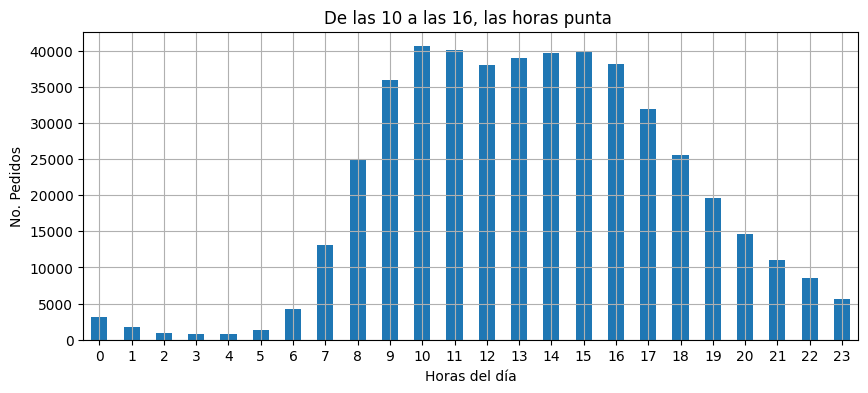

In [42]:
#Agrupamos por la hora del día y aplicamos .count() para obtener el total de pedidos de cada hora
df_graph = df_instacart_orders.groupby( by = 'order_hour_of_day', as_index = False ).count()

#Configuramos el gráfico usando 'order_hour_of_day' en el eje 'x' y 'user_id' (contiene el total de personas que hacen ordenes) para el eje 'x'
df_graph.plot(
    x = 'order_hour_of_day',
    y = 'user_id',
    xlabel = 'Horas del día',
    ylabel = 'No. Pedidos',
    title = 'De las 10 a las 16, las horas punta ',
    legend = False,
    kind = 'bar',
    rot = 0,
    grid= True,
    figsize = [10,4]
)

plt.show()

Después de elaborar el gráfico es muy fácil notar que las horas punta están entre las 10 y las 16 horas, aunque la hora en la que más pedidos se hacen es a las 10, al parecer a las personas les gusta hacer sus compras entre el medio día y el atardecer, es muy probable que sea así porque esas son las horas preferidas de la gente para comer.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [43]:
#Definir una función para clasificar los días de la semana según su número de día.
def day_of_week( num_day ):
    if num_day == 0:
        return 'Domingo'
    elif num_day == 1:
        return 'Lunes'
    elif num_day == 2:
        return 'Martes'
    elif num_day == 3:
        return 'Miércoles'
    elif num_day == 4:
        return 'Jueves'
    elif num_day == 5:
        return 'Viernes'
    elif num_day == 6:
        return 'Sábado'
    else:
        return 'Desconocido'

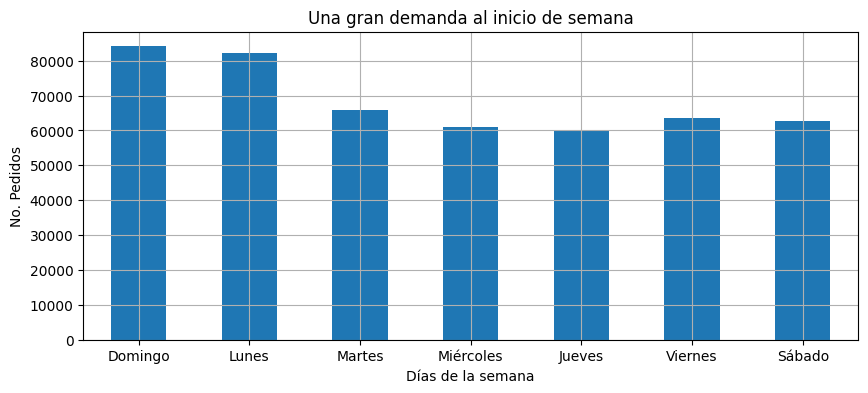

In [44]:
#Agrupamos por el día de la semana y plicamos .count() para obtener el total de pedidos de cada día
df_graph = df_instacart_orders.groupby( by = 'order_dow', as_index = False ).count()

#Usamos .apply() para crear la columna 'day_of_week' en la que se guardará el día de la semana que corresponde
df_graph[ 'day_of_week' ] = df_graph[ 'order_dow' ].apply( day_of_week )

#Configuramos el gráfico
df_graph.plot(
    x = 'day_of_week',
    y = 'user_id',
    xlabel = 'Días de la semana',
    ylabel = 'No. Pedidos',
    title = 'Una gran demanda al inicio de semana',
    legend = False,
    kind = 'bar',
    rot = 0,
    grid= True,
    figsize = [10,4]
)

plt.show()

Los días con la mayor demanda de pedidos sin duda alguna son el Domingo y el Lunes osea cuando recién inicia la semana, el resto de la semana es bastante estable, esto nos indica que a las personas les gusta iniciar su semana con los víveres necesarios.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

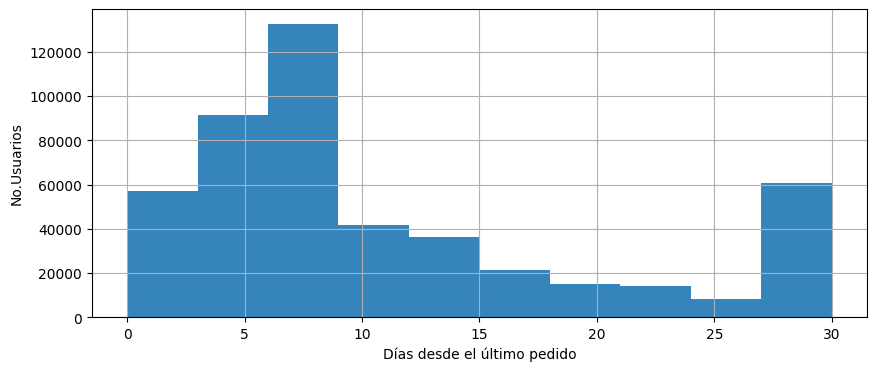

In [45]:
df_graph = df_instacart_orders

#Utilizando un histograma podremos observar los datos
df_graph[ 'days_since_prior_order' ].plot(
    kind = 'hist',
    title = '',
    figsize = [10,4],
    alpha = .9,
    grid = True
)

plt.xlabel( 'Días desde el último pedido' )
plt.ylabel( 'No.Usuarios' )
plt.show()

Parce que las personas tienen una preferencia para hacer sus compras cada semana lo que refuerza el gráfico anterior en donde se veía que cada inicio de semana( domingo y lunes) eran los días con mayor demanda, aunque tambíen se observa un gran grupo de clientes que no usan el servicio con frecuencia tardando hasta 30 días en realizar un nuevo pedido

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [46]:
# Crear un DataFrame con la información de los días miércoles.
# Obtenemos todos los pedidos del día miercoles
df_wednesday = df_instacart_orders.query( 'order_dow == 3' )
# Agrupamos los datos por hora del día en que se realizó el pedido
df_wednesday = df_wednesday.groupby( by = 'order_hour_of_day', as_index = False ).count()
# Solo nos quedamos con las columnas que necesitamos
df_wednesday = df_wednesday[ ['order_hour_of_day', 'order_id'] ]
# Cambiamos los nombres de las columnas por unos más adecuados
df_wednesday.columns = [ 'order_hour_of_day', 'wednesday_orders' ]

In [47]:
# Crear un DataFrame con la información de los días sábado.
# Obtenemos todos los pedidos del día sábado
df_saturday = df_instacart_orders.query( 'order_dow == 6' )
# Agrupamos los datos por hora del día en que se realizó el pedido
df_saturday = df_saturday.groupby( by = 'order_hour_of_day', as_index = False ).count()
# Solo nos quedamos con las columnas que necesitamos
df_saturday = df_saturday[ ['order_hour_of_day', 'order_id'] ]
# Cambiamos los nombres de las columnas por unos más adecuados
df_saturday.columns = [ 'order_hour_of_day', 'saturday_orders' ]

In [48]:
# Unificaremos los dos DataFrames en uno solo para poder gráficarlos
df_graph = pd.merge( df_saturday, df_wednesday, on = 'order_hour_of_day' )

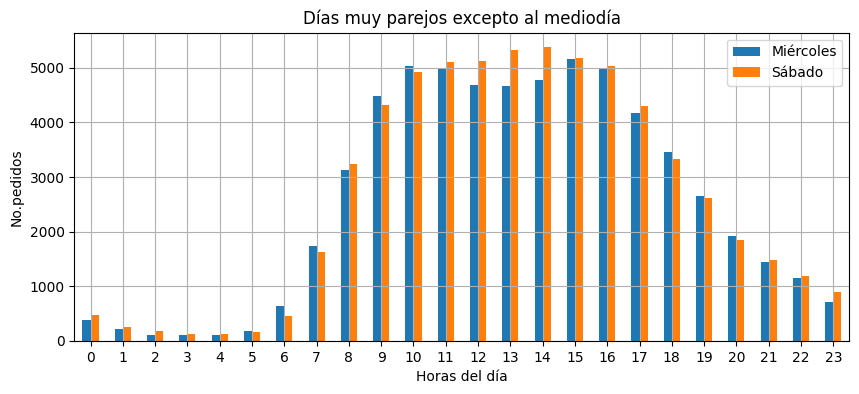

In [49]:
#Configuramos el gráfico 
df_graph.plot(
    kind = 'bar',
    title = 'Días muy parejos excepto al mediodía',
    x = 'order_hour_of_day',
    y = [ 'wednesday_orders', 'saturday_orders' ],
    xlabel = 'Horas del día',
    ylabel = 'No.pedidos',
    grid = True,
    rot = 0,
    figsize = [ 10, 4 ]
)

plt.legend( [ 'Miércoles', 'Sábado' ] )
plt.show()

Se puede observar que los ambos días se mantienen muy parejos en cuanto al número de pedidos que se realizan en las diferentes horas del día, excepto por el ranngo de las 12 a las 14 hrs en dónde claramente el sábado tiene una mayor demanda de pedidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [50]:
# Crear el DataFrame para gráficar 
# Agrupamos todos los pedidos de 'df_instacart_orders' por 'user_id' y aplicamos .max() 
#para obtener el total de pedidos realizados por cliente de la columna 'order_number'

df_graph = df_instacart_orders.groupby( by = 'user_id', as_index = False ).max()

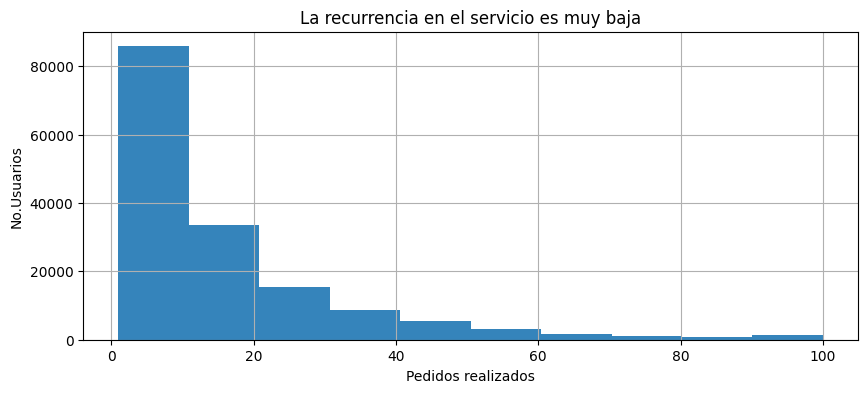

In [51]:
#Realiza el gráfico correspondiente
# Graficaremos el DataFrame como un histograma usando la columna 'order_number' así obtendremos un histograma que agrupe usuarios en función del número de pedidos realizados
df_graph[ 'order_number' ].plot(
    kind = 'hist',
    title = 'La recurrencia en el servicio es muy baja',
    figsize = [10,4],
    alpha = .9,
    grid = True
)

plt.xlabel( 'Pedidos realizados' )
plt.ylabel( 'No.Usuarios' )

plt.show()

Podemos observar en el histograma que la mayoria de usuarios solo piden una vez y no lo vuelven a hacer, los usuarios que piden con frecuencia son muy bajos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
#Crea un DataFrame con los 20 productos más vendidos
#Con ayuda de groupby() agruparemos los datos por 'product_id' y aplicaremos count() para así obtener el ID de los productos y el total de unidades vendidas
#Posteriormente con sort_values ordenaremos los valores en orden descendente, así tendremos los productos ordenados del más vendido al menos vendido
df_most_popular_products = df_order_products.groupby( by = 'product_id', as_index = False ).count().sort_values( 'reordered', ascending = False)

# Ahora solo nos quedaremos con las columnas 'product_id' y 'order_id', la primera contiene el ID de los productos y la segunda la cantidad vendida
df_most_popular_products = df_most_popular_products[ ['product_id', 'order_id'] ]

#Le damos un nombre más apropiado a las 2 columnas
df_most_popular_products.columns = ['product_id', 'total_sold'] 

#Ya que el DataFrame está ordenado del producto más vendido al menos vendido solo necesitamos los 20 primeras lineas para obtener nuestro top 20 de productos
df_most_popular_products = df_most_popular_products.iloc[ 0:20 ]


In [53]:
#Agrega el nombre de los productos al DataFrame anterior
#Con la ayuda de merge() uniremos el DataFrame de los productos más vendidos con el DataFrame de products con el objetivo de agregar los nombres a nuestro DataFrame de los productos más vendidos
df_most_popular_products = pd.merge( df_most_popular_products, df_products, on = 'product_id' )

#Solo nos quedaremos con las columnas de ID, cantidad vendida y nombre del producto
df_most_popular_products = df_most_popular_products[ ['product_id', 'total_sold', 'product_name'] ]

#Mostramos el top 20 de los productos más vendidos
df_most_popular_products

,product_id,total_sold,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


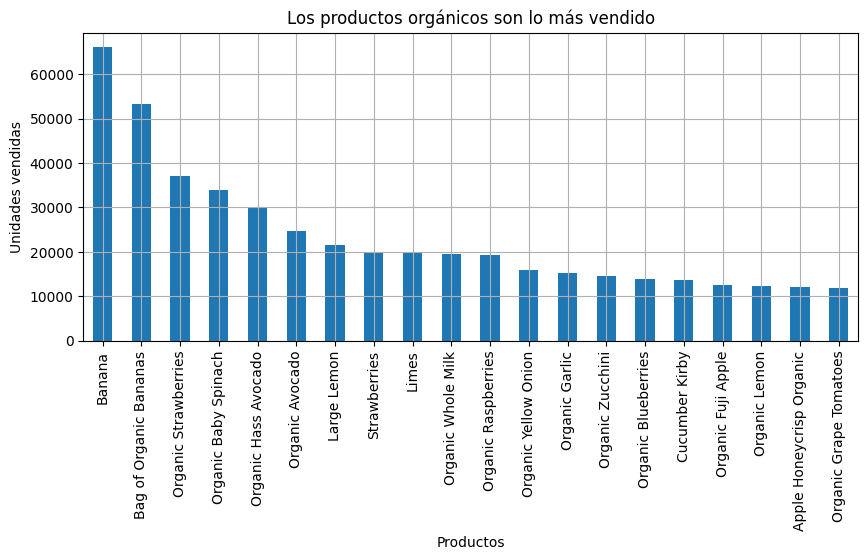

In [54]:
#Realiza un gráfico de los productos más vendidos
#Para facilitar la comparación de los productos se realiza un gráfico de barras 
df_most_popular_products.plot(
    title = 'Los productos orgánicos son lo más vendido',
    kind = 'bar',
    x = 'product_name',
    y = 'total_sold',
    xlabel = 'Productos',
    ylabel = 'Unidades vendidas',
    legend = False,
    figsize = [10,4],
    grid = True
)

plt.show()

Aunque las bananas son con bastante diferencia el producto más vendido, no se puede ignorar el hecho de que el resto del top 20 consiste casi en su totalidad de productos orgánicos

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [55]:
#Calcular el promedio de productos por pedido
#Agruparemos df_order_products por 'order_id' y aplicaremos un count() para poder calcular el total de articulos por pedido
df_temp = df_order_products.groupby( by = 'order_id', as_index = False ).count()

#Calcularemos el promedio con mean()
prom = int( df_temp['product_id'].mean() )

#Imprimimos el promedio en pantalla
print( f'Promedio de productos por pedido: { prom }' )

Promedio de productos por pedido: 10


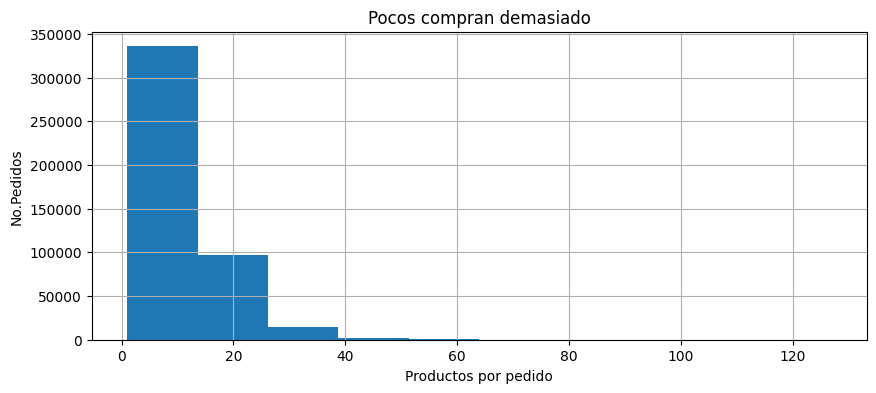

In [56]:
#Configuramos el grafico
df_temp[ 'product_id' ].plot(
    kind = 'hist',
    title = 'Pocos compran demasiado',
    figsize = [10,4],
    grid = True
)

plt.xlabel( 'Productos por pedido' )
plt.ylabel( 'No.Pedidos' )

plt.show()


Se puede apreciar en el gráfico que la gran mayoría de personas compran no más de 10 productos en cada pedido, y aunque hay personas que compran más de 100 son en realidad muy pocas

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [57]:
#Crea un DataFrame para almacenar los 20 principales artículos que vuelven a pedirse con mayor frecuencia
#Primero filtraremos todos los productos que se han vuelto a pedir en algún momento
df_reordered_products = df_order_products.query( 'reordered == 1' )

#Ahora agruparemos el DataFrame resultante del paso anterior por 'product_id' y aplicaremos count() para obtener el total de veces que cada producto fue reordenado
#y aplicamos sot_values() de forma descendente para ordenar del más pedido al menos pedido
df_reordered_products = df_reordered_products.groupby( by = 'product_id', as_index = False ).count().sort_values( 'order_id', ascending = False )

#Ahora que tenemos un DataFrame agrupado solo necesitamos 2 columnas una con el ID de los productos y cualquier otra columna( todas contienen el total de veces que el producto fue reordenado )
df_reordered_products = df_reordered_products[ [ 'product_id', 'order_id' ] ]

#Por último nombraremos a las columnas de una forma más clara
df_reordered_products.columns = [ 'product_id', 'total_reordered' ]

#Ahora solo recortaremos el DataFrame df_reordered_products para obtener los 20 más reordenados
df_reordered_products = df_reordered_products.iloc[ 0:20 ]


In [58]:
#Agrega el nombre de los productos al DataFrame anterior y muestra el resultado
#Con la ayuda de merge() uniremos el DataFrame df_reordered_products con el DataFrame de products con el objetivo de agregar los nombres de los productos a nuestro DataFrame df_reordered_products
df_reordered_products = pd.merge( df_reordered_products, df_products, on = 'product_id' )

#Solo nos quedaremos con las columnas de ID, total de veces reordenado y nombre del producto
df_reordered_products = df_reordered_products[ ['product_id', 'total_reordered', 'product_name'] ]

#Mostramos el top 20 de los productos más vendidos
df_reordered_products

,product_id,total_reordered,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


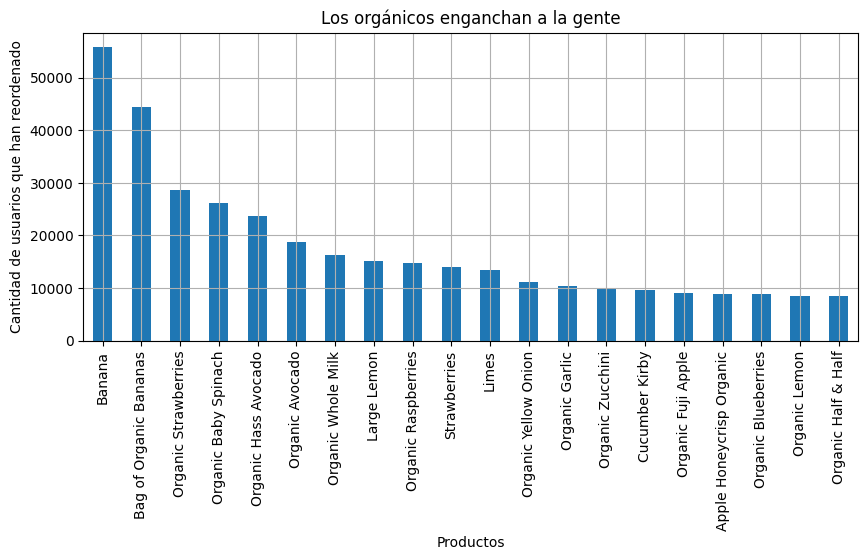

In [59]:
#Grafica el resultado para poder comparar los productos

df_reordered_products.plot(
    title = 'Los orgánicos enganchan a la gente',
    kind = 'bar',
    x = 'product_name',
    y = 'total_reordered',
    xlabel = 'Productos',
    ylabel = 'Cantidad de usuarios que han reordenado',
    legend = False,
    figsize = [10,4],
    grid = True
)

plt.show()

A simple vista se puede ver que el gráfico de los 20 más vendidos y el de los 20 que más se vuelven a pedir es muy parecido, lo que indica que nuestros usuarios prefieren los productos orgánicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
#Crea un DataFreme con la cantidad de pedidos ordenados por primera vez y reordenados
# Con ayuda de pivot_table agruparemos todos los productos por ID y si han sido comprados por primera vez o no y con la función de agregación count() obtendremos el total de cada uno
df_proportions = df_order_products.pivot_table( index = 'product_id', columns = 'reordered', values = 'order_id', aggfunc = 'count', fill_value = 0 )

#Le daremos un nombre más claro a cada columna
df_proportions.columns = [ 'first_order', 'reordered' ]

# Crearemos la columna total para poder ver los datos con mayor claridad
df_proportions[ 'total' ] = df_proportions[ 'first_order' ] + df_proportions[ 'reordered' ]

In [61]:
#Calcula las proporciones que se solicitaron
#Calcularemos la proporcion del total de veces que el producto fue pedido por primera vez / el total de ventas del producto
df_proportions[ 'proportion_first_order' ] = df_proportions[ 'first_order' ] / df_proportions[ 'total' ]

#Calcularemos la proporcion del total de veces que el producto fue pedido por primera vez / el total de ventas del producto
df_proportions[ 'proportion_reordered' ] = df_proportions[ 'reordered' ] / df_proportions[ 'total' ]

In [62]:
#Muestra el resultado
#Se ordenan los datos para ver primero los productos con más ventas totales
df_proportions.sort_values( by = 'total', ascending = False ).head( 30 )

,first_order,reordered,total,proportion_first_order,proportion_reordered
product_id,,,,,
24852,10287,55763,66050,0.155746,0.844254
13176,8847,44450,53297,0.165994,0.834006
21137,8400,28639,37039,0.226788,0.773212
21903,7738,26233,33971,0.227783,0.772217
47209,6144,23629,29773,0.206361,0.793639
47766,5946,18743,24689,0.240836,0.759164
47626,6451,15044,21495,0.300116,0.699884
16797,6073,13945,20018,0.303377,0.696623
26209,6363,13327,19690,0.323159,0.676841


Se puede observar que la proporcion de recompra es mayor que la de compra por primera vez en muchos productos, a la gente le gusta lo que compra y lo sigue haciendo 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:
# Crea un DataFreme con la cantidad de pedidos ordenados por primera vez y reordenados por cada usuario
#Lo primero será saber que usuario compró cada producto, para eso debemos unir los DataFrames df_order_products, df_instacart_orders en 'order_id'  
df_temp = pd.merge( df_order_products, df_instacart_orders, on = 'order_id' )

# Ahora con la ayuda de pivot_table() agruparemos los productos comprados por primera vez y los productos reordenados por cada usuario y aplicaremos la función de agregación count() para obtener el total de cada grupo  
df_proportions = df_temp.pivot_table( index = 'user_id', columns = 'reordered', values = 'order_id', aggfunc = 'count', fill_value = 0 )

# Ahora le daremos nombres más claros a las columnas
df_proportions.columns = [ 'first_order', 'reordered' ]

# Crearemos la columna total para poder ver los datos con mayor claridad
df_proportions[ 'total' ] = df_proportions[ 'first_order' ] + df_proportions[ 'reordered' ]

In [64]:
#Calcula las proporciones que se solicitaron
#Calcularemos la proporción del total de veces que el producto fue pedido por primera vez / el total de pedidos del usuario
df_proportions[ 'proportion_first_order' ] = df_proportions[ 'first_order' ] / df_proportions[ 'total' ]

#Calcularemos la proporción del total de veces que el producto fue pedido por primera vez / el total de pedidos del usuario

df_proportions[ 'proportion_reordered' ] = df_proportions[ 'reordered' ] / df_proportions[ 'total' ]

In [65]:

#Muestra el resultado
#Se ordenan los datos para ver primero los usuarios con más productos comprados en total
df_proportions.sort_values( by = 'total', ascending = False )


,first_order,reordered,total,proportion_first_order,proportion_reordered
user_id,,,,,
103634,103,477,580,0.177586,0.822414
33731,103,437,540,0.190741,0.809259
137629,82,444,526,0.155894,0.844106
23371,78,428,506,0.154150,0.845850
164055,55,449,504,0.109127,0.890873
...,...,...,...,...,...
82057,0,1,1,0.000000,1.000000
114847,0,1,1,0.000000,1.000000
178865,0,1,1,0.000000,1.000000


Los usuarios tienen una proporción de recompra bastante alta, lo que indica que se mantienen leales a ciertos productos

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [66]:
#Crea un DataFrame para almacenar los 20 principales articulos que se ponen primero en el carrito
#Primero filtraremos todos los productos que en algún momento fueron los primeros en ser agregados a un pedido
df_first_products = df_order_products.query( 'add_to_cart_order == 1' )

#Ahora agruparemos el DataFrame resultante del paso anterior por 'product_id' y aplicaremos count() para obtener el total de veces que cada prodducto fue el primero en ser agregado
df_first_products = df_first_products.groupby( by = 'product_id', as_index = False ).count().sort_values( 'order_id', ascending = False )

#Ahora que tenemos un DataFrame agrupado solo necesitamos 2 columnas una con el ID de los productos y cualquier otra columna( todas contienen el total de veces que el producto fue el primero en ser agregado al carrito )
df_first_products = df_first_products[ [ 'product_id', 'order_id' ] ]

#Por último nombraremos a las columnas de una forma más clara
df_first_products.columns = [ 'product_id', 'firs_in_cart' ]

#Ahora solo recortaremos el DataFrame df_first_products para obtener los 20 más colocados primero en el pedido
df_first_products = df_first_products.iloc[ 0:20 ]


In [67]:
#Agrega el nombre de los productos al DataFrame anterior y muestra el resultado
#Con la ayuda de merge() uniremos el DataFrame df_first_products con el DataFrame de products con el objetivo de agregar los nombres de los productos a nuestro DataFrame df_first_products
df_first_products = df_first_products.merge( df_products, on = 'product_id' )

#Solo nos quedaremos con las columnas de ID, cantidad vendida y nombre del producto
df_first_products = df_first_products[ ['product_id', 'firs_in_cart', 'product_name'] ]

#Mostramos el top 20 de los productos más vendidos
df_first_products

,product_id,firs_in_cart,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


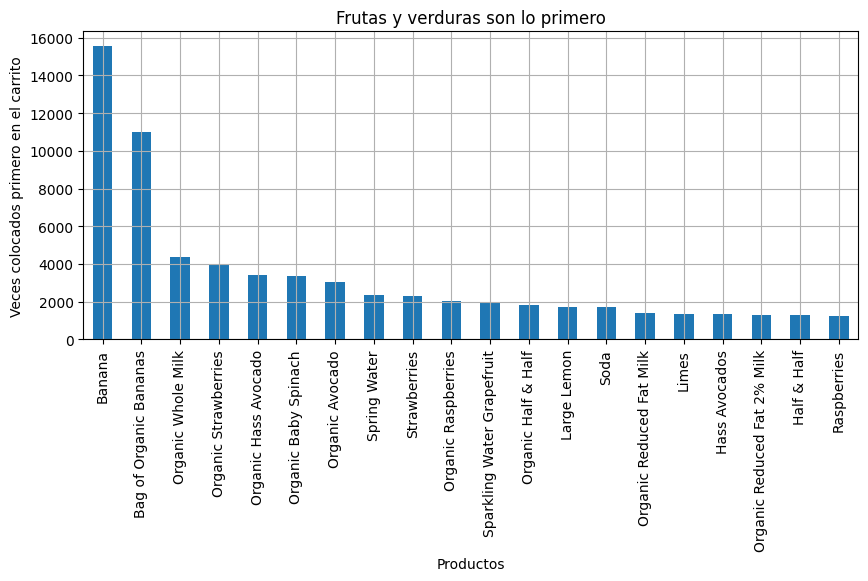

In [68]:
#Grafica el resultado para poder comparar los productos

df_first_products.plot(
    title = 'Frutas y verduras son lo primero',
    kind = 'bar',
    x = 'product_name',
    y = 'firs_in_cart',
    xlabel = 'Productos',
    ylabel = 'Veces colocados primero en el carrito',
    legend = False,
    figsize = [10,4],
    grid = True
)

plt.show()

De nuevo el gráfico de los 20 más vendidos se parece mucho a este de aquí, se nota que los usuarios tienen una fuerte preferencia hacía estos productos

### Conclusion general del proyecto:

Despúes del analisis es muy obvio que la gente busca principalmente productos veganos en instacart y apesar de que según los datos muchas personas solo compran una vez en la plataforma y no lo vuelven a hacer muchas otras se mantienen leales y compran una gran cantidad de articulos, es por eso que en proporción la mayoria de las compras son de productos que ya se han pedido con anterioridad.

Este proyecto sin duda se sintó más desafiante que los anteriores pero me siento feliz porque al realizarlo aprendí y entendí muchas cosas que estoy seguro me servirán más adelante. Aunque sé que el proyecto no ha sido calificado y quiza tenga que corregir o cambiar algunas cosas, o muchas ,me siento muy feliz por haberlo terminado.